In [1]:
import torch
import sys
sys.path.append('../')
from VAE.core import Inference as Inference_S0
from VAE.core import Generator as Generator_S0

import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import torch
import numpy as np

device = "cpu"

vae_path = "epoch0404-iter00337-7104.103515625.pt"
encoder = Inference_S0(64).to(device)
encoder.load_state_dict(torch.load("../VAE/logs/q/" + vae_path))

decoder = Generator_S0(64).to(device)
decoder.load_state_dict(torch.load("../VAE/logs/p/" + vae_path))

<All keys matched successfully>

In [2]:
from config import get_args
args = get_args(jupyter=True)
from data_loader import PushDataLoader
train_loader = PushDataLoader("train", args)

torch.Size([32, 10, 3, 64, 64])


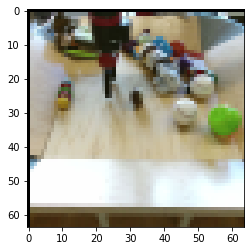

In [16]:
x, a, itr = next(train_loader)
print(x.shape)
plt.imshow(x[0,0].cpu().detach().numpy().transpose(1, 2, 0))
plt.show()

In [21]:
x1, a, itr = next(train_loader)
x2, a, itr = next(train_loader)
x3, a, itr = next(train_loader)
x4, a, itr = next(train_loader)
x = torch.cat([x1,x2,x3,x4], dim=0)
print(x.shape)

torch.Size([128, 10, 3, 64, 64])


In [18]:
# a = torch.zeros(32, 3, 64, 64).to(device)
z = encoder.sample_mean({"x": x[:,0]})# .shape
z.shape

torch.Size([32, 64])

In [23]:
# a = torch.zeros(32, 3, 64, 64).to(device)
z1 = encoder.sample_mean({"x": x1[:,0]})# .shape
z2 = encoder.sample_mean({"x": x2[:,0]})# .shape
z3 = encoder.sample_mean({"x": x3[:,0]})# .shape
z4 = encoder.sample_mean({"x": x4[:,0]})# .shape
z.shape

torch.Size([32, 64])

In [31]:
z1.norm(dim=1).mean(), z1.norm(dim=1).std()

(tensor(4.7181, grad_fn=<MeanBackward0>),
 tensor(0.9335, grad_fn=<StdBackward0>))

In [37]:
np.zeros([10,10])[0:1]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
writer.add_scalar("s0/norm_mean", )
writer.add_scalar("s0/norm_std", )

In [11]:
from torch.utils.tensorboard import SummaryWriter
import numpy as np
writer = SummaryWriter("../runs/")

In [25]:

# for i in range(32):
writer.add_histogram('distribution centers8-0', z1[:, 0], 0)
# for i in range(32):
writer.add_histogram('distribution centers8-0', z2[:, 0], 1)
# for i in range(32):
writer.add_histogram('distribution centers8-0', z3[:, 0], 2)
# for i in range(32):
writer.add_histogram('distribution centers8-0', z4[:, 0], 3)
# writer.close()

(64, 64, 3)


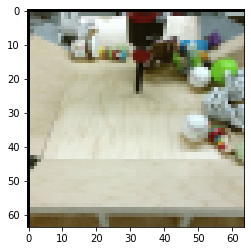

(1, 64, 64, 3)


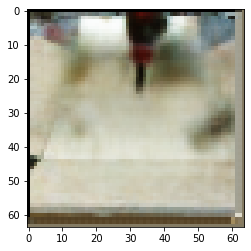

In [34]:
a = cv2.imread("individualImage.png")[:64,:64,::-1]
print(a.shape)
plt.imshow(a)
plt.show()

a = a.reshape(1, 64, 64, 3).astype(np.float32) / 255.
a = torch.from_numpy(a.transpose(0, 3, 1, 2))
z = encoder.sample({"x": a}, return_all=False)
img = decoder.sample_mean(z).cpu().detach().numpy().transpose(0, 2, 3,1)
print(img.shape)
plt.imshow(img[0])
plt.show()

(128, 64, 64, 3)


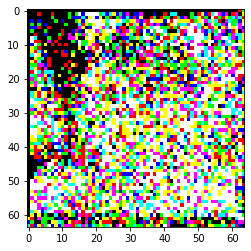

In [22]:
# a = a.reshape(1, 64, 64, 3).astype(np.float32) / 255.
# a = torch.from_numpy(a.transpose(0, 3, 1, 2))
a = x[:,0]
z = encoder.sample({"x": a}, return_all=False)
img = decoder.sample(z, return_all=False)["x"].cpu().detach().numpy().transpose(0, 2, 3,1)
print(img.shape)
plt.imshow(img[0])
plt.show()

(128, 64, 64, 3)


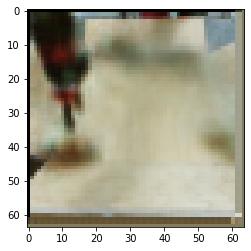

In [49]:
# a = a.reshape(1, 64, 64, 3).astype(np.float32) / 255.
# a = torch.from_numpy(a.transpose(0, 3, 1, 2))
a = x[:,1]
z = encoder.sample({"x": a}, return_all=False)
img = decoder.sample_mean(z).cpu().detach().numpy().transpose(0, 2, 3,1)
print(img.shape)
plt.imshow(img[0])
plt.show()

In [50]:
z, z["z"].mean()

({'z': tensor([[ 4.4397e-01,  1.6127e+00,  1.3799e+00,  ...,  1.9063e-03,
           -7.5938e-01,  2.8319e-01],
          [ 1.4030e-01, -1.9338e-01, -2.0571e+00,  ..., -6.0735e-01,
           -2.0370e+00, -1.8836e+00],
          [-5.3374e-01,  1.2705e+00, -1.6613e+00,  ..., -2.5769e-01,
            1.6609e+00, -6.0841e-01],
          ...,
          [ 7.9327e-01,  7.0822e-01,  1.1998e+00,  ...,  7.8012e-01,
            2.1200e-01,  9.3412e-01],
          [-1.1644e+00, -1.9128e+00, -1.8041e+00,  ...,  1.0106e+00,
           -2.4353e-01,  6.4241e-01],
          [ 7.3189e-01,  1.3241e+00, -5.9490e-01,  ..., -8.9547e-01,
           -1.1146e-01,  9.7119e-01]])}, tensor(0.0087))

In [1]:
from pixyz_utils import *

In [2]:
eval_mode()

TypeError: eval_mode() missing 1 required positional argument: 'model'

(128, 64, 64, 3)


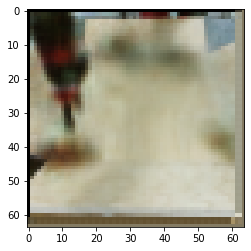

In [51]:
# a = a.reshape(1, 64, 64, 3).astype(np.float32) / 255.
# a = torch.from_numpy(a.transpose(0, 3, 1, 2))
a = x[:,1]
z = encoder.sample_mean({"x": a})
img = decoder.sample_mean({"z":z}).cpu().detach().numpy().transpose(0, 2, 3,1)
print(img.shape)
plt.imshow(img[0])
plt.show()

In [52]:
z, z.mean()

(tensor([[-9.5767e-03, -3.4180e-02,  1.1640e-02,  ...,  3.2667e-01,
           7.6529e-03,  3.4401e-01],
         [ 4.0030e-03,  1.6774e-02, -3.3107e-02,  ..., -5.4964e-01,
           2.6970e-02, -1.7241e+00],
         [-3.2768e-03,  1.0510e-02, -3.6027e-02,  ..., -4.3260e-01,
          -6.6306e-03, -9.2831e-01],
         ...,
         [-1.5264e-02, -4.3075e-02,  1.8578e-02,  ...,  1.1186e+00,
          -1.6837e-02,  6.5378e-01],
         [ 2.7490e-04, -5.9557e-03, -9.8352e-03,  ...,  6.1218e-01,
           1.3913e-03,  5.3414e-01],
         [-1.3118e-02,  8.1341e-03, -2.3922e-02,  ..., -4.4126e-01,
           2.6249e-02,  7.2917e-01]], grad_fn=<AddmmBackward>),
 tensor(0.0034, grad_fn=<MeanBackward0>))

In [30]:
encoder.sample_variance({"x": a}).mean()

tensor(0.6585, grad_fn=<MeanBackward0>)

In [31]:
decoder.sample_variance({"z": z}).mean()

tensor(0.1964, grad_fn=<MeanBackward0>)

In [17]:
img.max(), img.min(),img.shape

(0.9999473, 3.0272718e-12, (128, 64, 64, 3))

In [18]:
img *= 255
img = img.astype(np.uint8)

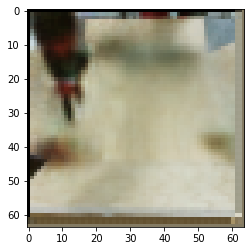

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline



In [ ]:
encoder()

In [3]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [4]:
sys.path

NameError: name 'sys' is not defined

['/root/share/hssm_push/SSM',
 '/root/.pyenv/versions/3.7.4/lib/python37.zip',
 '/root/.pyenv/versions/3.7.4/lib/python3.7',
 '/root/.pyenv/versions/3.7.4/lib/python3.7/lib-dynload',
 '',
 '/root/.pyenv/versions/3.7.4/lib/python3.7/site-packages',
 '/root/.pyenv/versions/3.7.4/lib/python3.7/site-packages/IPython/extensions',
 '/root/.ipython',
 '../',
 '../',
 '../',
 '../VAE']

In [ ]:
train_loader.L